sprm.py subpackage: examples
==========================

This Jupyter notebook walks the user through a set of examples for the `sprm` package. 
At first, source packages and data: 

In [17]:
import pandas as ps
data = ps.read_csv("../data/Returns_shares.csv")
columns = data.columns[2:8]
data = data.values[:,2:8]
X = data[:,0:5]
y = data[:,5]
X0 = X.astype('float')
y0 = y.astype('float')

The SPRM estimator
-----------------------------
Sparse Partial Robust M-regression is an estimator that accomplishes sparse and robust dimension reduction, as well as sparse and robust regularized regression at the same time. It was first published in: 

[Sparse partial robust M regression](https://www.sciencedirect.com/science/article/abs/pii/S0169743915002440), Irene Hoffmann, Sven Serneels, Peter Filzmoser, Christophe Croux, Chemometrics and Intelligent Laboratory Systems, 149 (2015), 50-59.

With `eta=0`, it becomes non-sparse, and is identical to Partial Robust M-regression, first published in:

[Partial robust M regression](https://doi.org/10.1016/j.chemolab.2005.04.007), Sven Serneels, Christophe Croux, Peter Filzmoser, Pierre J. Van Espen, Chemometrics and Intelligent Laboratory Systems, 79 (2005), 55-64.

Please be mindful to cite these references when appropriate.

To run a toy example of SPRM:
Call the estimator, then fit on training data

In [18]:
from sprm import sprm
res_sprm = sprm(2,.8,'Hampel',.95,.975,.999,'kstepLTS','mad',True,100,.01,'ally','xonly',columns,True)
res_sprm.fit(X0[:2666],y0[:2666])


Variables retained for 1 latent variable(s):
Index(['GE'], dtype='object').

Variables retained for 2 latent variable(s):
Index(['KMB', 'XOM', 'GE', 'AMZN'], dtype='object').

Variables retained for 1 latent variable(s):
Index(['GE'], dtype='object').

Variables retained for 2 latent variable(s):
Index(['KMB', 'XOM', 'GE'], dtype='object').

Variables retained for 1 latent variable(s):
Index(['GE'], dtype='object').

Variables retained for 2 latent variable(s):
Index(['KMB', 'XOM', 'GE'], dtype='object').

Variables retained for 1 latent variable(s):
Index(['GE'], dtype='object').

Variables retained for 2 latent variable(s):
Index(['KMB', 'XOM', 'GE'], dtype='object').

Variables retained for 1 latent variable(s):
Index(['GE'], dtype='object').

Variables retained for 2 latent variable(s):
Index(['KMB', 'XOM', 'GE'], dtype='object').

Final Model: Variables retained for 2 latent variables: 
Index(['KMB', 'XOM', 'GE'], dtype='object')



sprm(centre='kstepLTS',
     columns=Index(['KMB', 'XOM', 'ABX', 'GE', 'AMZN', 'AIG'], dtype='object'),
     copy=True, eta=0.8, fun='Hampel', maxit=100, n_components=2, probp1=0.95,
     probp2=0.975, probp3=0.999, scale='mad', start_X_init='xonly',
     start_cutoff_mode='ally', tol=0.01, verbose=True)

Predict, estimate scores and weight cases (outlier check) for test data 

In [19]:
res_sprm.predict(X0[2666:])
res_sprm.transform(X0[2666:])
res_sprm.weightnewx(X0[2666:])

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

`sklearn` API compatibility, e.g.:

In [20]:
res_sprm.get_params()
res_sprm.set_params(centre='median',verbose=False)

sprm(centre='median',
     columns=Index(['KMB', 'XOM', 'ABX', 'GE', 'AMZN', 'AIG'], dtype='object'),
     copy=True, eta=0.8, fun='Hampel', maxit=100, n_components=2, probp1=0.95,
     probp2=0.975, probp3=0.999, scale='mad', start_X_init='xonly',
     start_cutoff_mode='ally', tol=0.01, verbose=False)

The SNIPLS estimator
--------------------------------
SNIPLS is the non-robust sparse univariate PLS algorithm \[3\]. SNIPLS can be used as a standalone, `sklearn`-compatible estimator, but is also used internally by SPRM. SNIPLS takes the same arguments as SPRM, except for `'fun'` and `'probp1'` through `'probp3'`, since these are robustness parameters. For the same reasons, the outputs are limited to sparse dimension reduction and regression outputs. Robustness related outputs like `x_caseweights_` cannot be provided.
The SNIPLS algorithm was first outlined in: 
[Sparse and robust PLS for binary classification](https://onlinelibrary.wiley.com/doi/abs/10.1002/cem.2775), I. Hoffmann, P. Filzmoser, S. Serneels, K. Varmuza, Journal of Chemometrics, 30 (2016), 153-162.

In [21]:
from sprm import snipls
res_snipls = snipls(n_components=4, eta=.5)
res_snipls.fit(X0[:2666],y0[:2666])
res_snipls.predict(X0[2666:])

Variables retained for 1 latent variable(s):
[1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 4 latent variable(s):
[0. 1. 2. 3. 4.].



matrix([[ 1.95585398e+00],
        [-4.56052393e-02],
        [ 1.23620289e+00],
        [ 1.43524688e-01],
        [-6.88922556e-01],
        [ 1.14208815e+00],
        [ 1.55819550e-01],
        [-9.25714841e-01],
        [ 1.77895408e+00],
        [-1.24887918e-01],
        [ 1.08000143e+00],
        [ 9.07066293e-02],
        [-1.28980813e+00],
        [ 4.31396093e-01],
        [-4.63901430e-01],
        [ 3.66792954e-01],
        [-5.50455310e-01],
        [-1.44831211e-01],
        [-9.09072510e-01],
        [ 6.31443156e-01],
        [-2.59811081e-01],
        [ 7.05874665e-01],
        [-9.51431765e-01],
        [-8.03020814e-01],
        [-9.50194536e-02],
        [ 3.16039589e-01],
        [-1.29160189e+00],
        [ 4.52712405e-01],
        [ 1.39001041e+00],
        [ 4.86363969e-02],
        [-2.96698891e-01],
        [ 3.34567296e-01],
        [-9.19919503e-01],
        [-4.91861759e-01],
        [-2.92093338e-01],
        [-2.14245202e+00],
        [ 7.58839010e-01],
 

The Robust M (RM) estimator
------------------------------------------
RM has been implemented to be consistent with SPRM. It takes the same arguments, except for `eta`, `n_components` and `columns`, because it does not perform dimension reduction nor variable selection. For the same reasons, the outputs are limited to regression outputs. Therefore, dimension reduction outputs like `x_scores_`, `x_loadings_`, etc. are not provided. For `R` adepts, note that a [cellwise robust](https://github.com/SebastiaanHoppner/CRM) version of RM has recently been introduced. 
        
To estimate and predict by RM: 

In [22]:
from sprm import rm
res_rm = rm('Hampel',.95,.975,.999,'median','mad','specific',True,100,.01,True)
res_rm.fit(X0[:2666],y0[:2666])
res_rm.predict(X0[2666:])

matrix([[ 1.61093856e+00],
        [-1.23600450e-01],
        [ 8.93163276e-01],
        [ 2.34391963e-01],
        [-6.36486944e-01],
        [ 7.41768724e-01],
        [ 1.12592479e-01],
        [-7.16087780e-01],
        [ 1.33836551e+00],
        [-1.17228793e-01],
        [ 8.02759514e-01],
        [ 1.77870477e-01],
        [-9.51861989e-01],
        [ 2.62998482e-01],
        [-5.47313113e-01],
        [ 3.90851869e-01],
        [-4.90942836e-01],
        [-1.64067306e-01],
        [-5.45091447e-01],
        [ 2.86511791e-01],
        [-1.22321829e-01],
        [ 4.71515813e-01],
        [-5.10597299e-01],
        [-6.00942076e-01],
        [-1.98966972e-02],
        [ 2.11430147e-01],
        [-8.84937914e-01],
        [ 2.88121640e-01],
        [ 1.00506956e+00],
        [ 3.76148688e-02],
        [-2.48720781e-01],
        [ 3.11929262e-01],
        [-5.26639979e-01],
        [-5.24179864e-01],
        [ 1.50845365e-01],
        [-1.65562365e+00],
        [ 5.57156670e-01],
 

Plotting functionality
----------------------
Let's now extend the example using the plotting functionality. 

To get started: 
    
- initialize howo we want the plot to look: 

In [23]:
colors = ["white","#BBBBDD","#0000DD",'#1B75BC','#4D4D4F','orange','red','black']
markers = ['o','d','v']
label = ["AIG"]
names = [str(i) for i in range(1,len(res_sprm.y)+1)]
namesv = [str(i) for i in range(1,len(y0[2667:])+1)]

- run `sprm.plot` and plot coefficients:

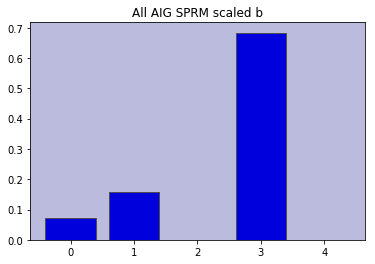

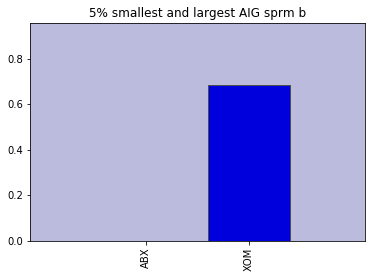

In [24]:
from sprm import sprm_plot
res_sprm_plot = sprm_plot(res_sprm,colors)
res_sprm_plot.plot_coeffs(title="All AIG SPRM scaled b")
res_sprm_plot.plot_coeffs(truncation=.05,columns=columns,title="5% smallest and largest AIG sprm b")

- plot y vs y predicted, training cases only: 

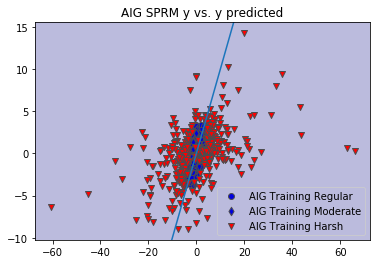

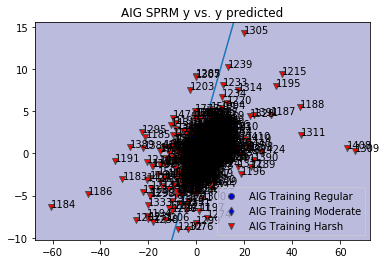

In [25]:
res_sprm_plot.plot_yyp(label=label,title="AIG SPRM y vs. y predicted")
res_sprm_plot.plot_yyp(label=label,names=names,title="AIG SPRM y vs. y predicted")

- plot y vs y predicted, including test cases

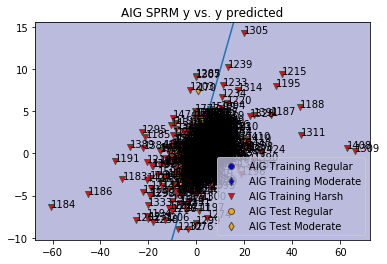

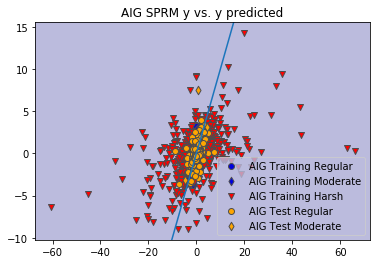

In [26]:
res_sprm_plot.plot_yyp(ytruev=y0[2667:],Xn=X0[2667:],label=label,names=names,namesv=namesv,title="AIG SPRM y vs. y predicted")            
res_sprm_plot.plot_yyp(ytruev=y0[2667:],Xn=X0[2667:],label=label,title="AIG SPRM y vs. y predicted")

- plot y vs y predicted, only test set cases: 

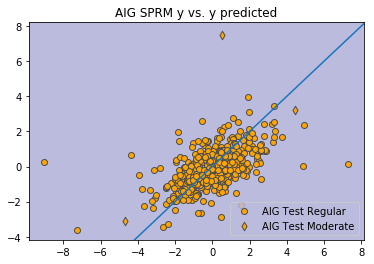

In [27]:
res_sprm_plot.plot_yyp(ytruev=y0[2667:],Xn=X0[2667:],label=label,title="AIG SPRM y vs. y predicted",onlyval=True)

- plot score space, options as above: 

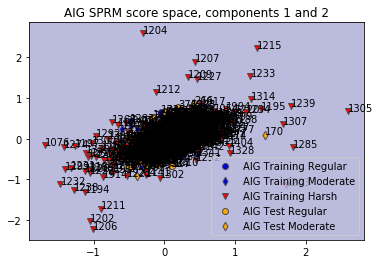

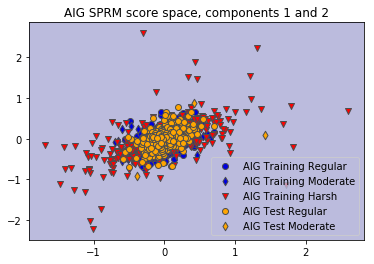

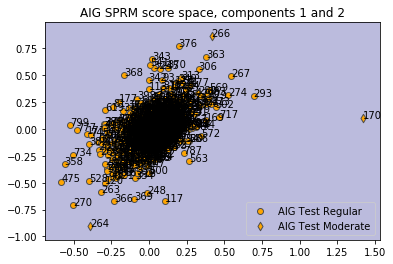

In [28]:
res_sprm_plot.plot_projections(Xn=X0[2667:],label=label,names=names,namesv=namesv,title="AIG SPRM score space, components 1 and 2")
res_sprm_plot.plot_projections(Xn=X0[2667:],label=label,title="AIG SPRM score space, components 1 and 2")
res_sprm_plot.plot_projections(Xn=X0[2667:],label=label,namesv=namesv,title="AIG SPRM score space, components 1 and 2",onlyval=True)

- plot caseweights, options still as above:

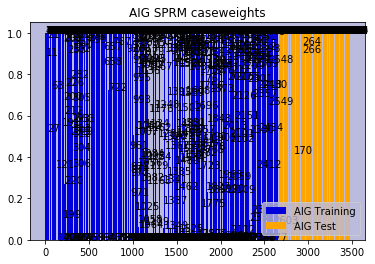

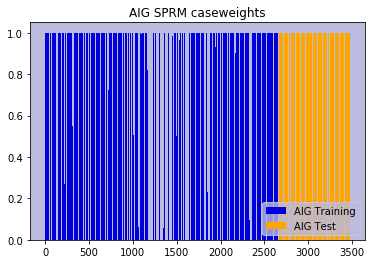

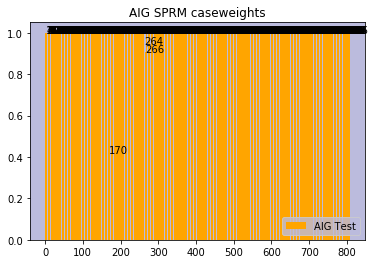

In [29]:
res_sprm_plot.plot_caseweights(Xn=X0[2667:],label=label,names=names,namesv=namesv,title="AIG SPRM caseweights")
res_sprm_plot.plot_caseweights(Xn=X0[2667:],label=label,title="AIG SPRM caseweights")
res_sprm_plot.plot_caseweights(Xn=X0[2667:],label=label,namesv=namesv,title="AIG SPRM caseweights",onlyval=True)  

Cross-validation using `GridSearchCV`
--------------------------------------------------------

All modules have been written to be compatible with ScikitLearn's APIs for pipelines and model tuning. That statement also holds true for the other modules in this package, e.g. `preprocessing.py`.
To illustrate this, let's run a grid search cross-validation for SPRM. Note that this can take a while to complete. 

In [30]:
import numpy as np
from sklearn.model_selection import GridSearchCV 
res_sprm_cv = GridSearchCV(sprm(), cv=10, param_grid={"n_components": [1, 2, 3], "eta": np.arange(.1,.9,.05).tolist()})  
res_sprm_cv.fit(X0[:2666],y0[:2666])  
res_sprm_cv.best_params_


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retai

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retai

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variabl

Final Model: Variables retained for 3 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 lat


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variabl


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retai

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 la

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variabl


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variabl

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent vari


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 laten


Variables retained for 1 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1.

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0.


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 3 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):



Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables 

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variable

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables re


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Va

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 3 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s)

Final Model: Variables retained for 3 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 late

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 late

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 3 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Va

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].



Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3. 


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):


Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables re


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained f

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Va

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.


Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent 


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent var


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retaine

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Va

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables ret

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1.

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0.

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent vari

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Va

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0.

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Varia

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Va


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Final Model: Variables retained for 3 latent variables: 
[0. 1. 2. 3. 4.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables r

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Va

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Va

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 1 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Va

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variabl

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent var

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables 


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables ret

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variab

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables 

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Vari

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent 


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Vari

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables reta


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1


Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables ret

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables reta

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables 

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(


Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent va

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 late


Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[0. 1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Varia

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Va

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables 

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables 

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Final Model: Variables retained for 1 latent variables: 
[3.]


Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.]

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables 

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 late

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables 

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Mode

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent var

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 late

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 l

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 l

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 l

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Final Model: Variables retained for 1 latent variables: 
[3.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].




Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 2 latent vari

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables 


Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent var


Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 lat

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent 

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 3 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Final Model: Variables retained for 1 latent variables: 
[3.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].



Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Final Model: Variables retained for 1 latent variables: 
[3.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].



Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained 


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 laten

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent varia

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 late

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Final Model: Variables retained for 1 latent variables: 
[3.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].



Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 1 latent variable(s):
[3.].

Variables re


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Final Model: Variables retained for 2 latent variables: 
[1. 3.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained fo

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 1 latent varia


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 2. 3. 4.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3. 4.].

Final Model: Variables retained for 3 latent variables: 
[0. 1. 3. 4.]


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained f

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1


Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[1. 3.].

Variables retained for 3 latent variable(s):
[0. 1. 3.].

V


Variables retained for 1 latent variable(s):
[1. 3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Variables retained for 1 latent variable(s):
[3.].

Variables retained for 2 latent variable(s):
[0. 1. 3.].

Final Model: Variables retained for 2 latent variables: 
[0. 1. 3.]



{'eta': 0.7000000000000002, 'n_components': 2}

- Now plot cross-validation results: 

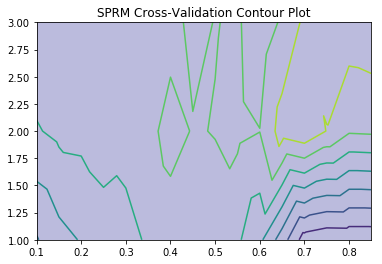

etas  n_components     score
0   0.10             1  0.209644
1   0.10             2  0.219579
2   0.10             3  0.223741
3   0.15             1  0.213361
4   0.15             2  0.221143
5   0.15             3  0.223019
6   0.20             1  0.215322
7   0.20             2  0.221395
8   0.20             3  0.221180
9   0.25             1  0.217667
10  0.25             2  0.222503
11  0.25             3  0.224142
12  0.30             1  0.218525
13  0.30             2  0.221623
14  0.30             3  0.222074
15  0.35             1  0.220588
16  0.35             2  0.223325
17  0.35             3  0.221849
18  0.40             1  0.222064
19  0.40             2  0.227095
20  0.40             3  0.222873
21  0.45             1  0.224560
22  0.45             2  0.224656
23  0.45             3  0.226560
24  0.50             1  0.222901
25  0.50             2  0.225173
26  0.50             3  0.224812
27  0.55             1  0.220773
28  0.55             2  0.226114
29  0.55             3  0.225642
30  0.60             1  0.216187
31  0.60             2  0.225080
32  0.60             3  0.221995
33  0.65             1  0.207434
34  0.65             2  0.232277
35  0.65             3  0.225716
36  0.70             1  0.197702
37  0.70             2  0.234071
38  0.70             3  0.231057
39  0.75             1  0.196325
40  0.75             2  0.229828
41  0.75             3  0.232566
42  0.80             1  0.196448
43  0.80             2  0.225603
44  0.80             3  0.232952
45  0.85             1  0.196448
46  0.85             2  0.225868
47  0.85             3  0.233671

In [16]:
from sprm import sprm_plot_cv
res_sprm_plot_cv = sprm_plot_cv(res_sprm_cv,colors)
res_sprm_plot_cv.eta_ncomp_contour()
res_sprm_plot_cv.cv_score_table_